In [790]:
import numpy as np
from labtools import time_freq_scan as tfs
import labtools as lt
from matplotlib import pyplot as plt
import os
from scipy.signal import find_peaks

from labtools import scanner
from scipy.optimize import curve_fit
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [791]:
import pandas as pd

In [792]:
folder = "/home/bbuusshh/my_git/data/eta"

In [793]:
os.listdir(folder)

['pulse_seq_Eta_zoomed_0.dump',
 'g2_with_magnet_front_0.dump',
 'eta_bright_0.dump',
 'pulse_increase_forEta_2.dump',
 'pulse_length_test_0.dump',
 'eta_betterBtoN_molecule3_0.dump',
 '1.5ns_pulse_0.dump',
 'g2_mole01_1.dump',
 'anti_b_1_0.dump',
 'g2_0.dump',
 'eta_bright_withFiberFIlter_0.dump']

In [794]:
dumps = ['g2_0', 'g2_with_magnet_front_0', 'anti_b_1_0']

In [795]:
trig = 10000*1e3

In [796]:
time = []
for dmp in dumps:
    data = np.fromfile(os.path.join(folder, f'{dmp}.dump'),count=int(1e7), dtype=lt.DUMP_TYPE)
    data['time'] = data['time'] - data['time'][0]
    time.append(data['time'][-1])

In [797]:
min_time = min(time)

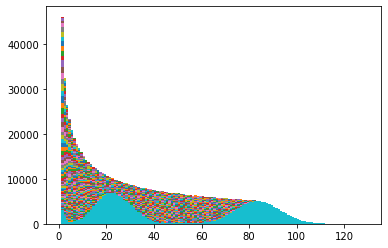

In [798]:
min_times = []
dms_dumps = []
for dmp in dumps:
    data = np.fromfile(os.path.join(folder, f'{dmp}.dump'),count=int(1e7), dtype=lt.DUMP_TYPE)
    data['time'] = data['time'] - data['time'][0]
    data_c = data[data['time'] < min_time]
    trigs = (np.linspace(1, 60000, 300)*1e3).astype(int)
    datas = (data_c['time'] // trigs[-1]).astype(int)
    T_max = datas[-1]
    dms = np.zeros(5)
    for trig in trigs:
        datas = (data_c['time'] // trig).astype(int)
        datas = datas[datas < T_max]
        T = datas[-1]
        nums = np.bincount(datas)
        nums=nums[nums > 0]
        hist = plt.hist(nums, bins=np.unique(nums));
        dms = np.vstack((dms, np.array([hist[0].sum(), 
                                        hist[0][1:].sum(), 
                                        hist[0][2:].sum(),
                                       hist[0][3:].sum(), T])))
        hist, nums = None, None # take it eason memoty 
    dms_dumps.append(dms)

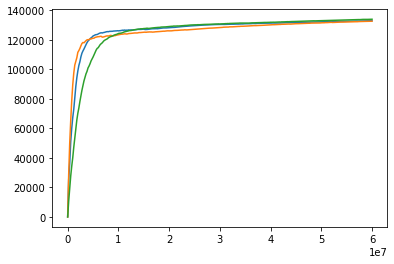

In [799]:
for dms in np.array(dms_dumps):
    plt.plot(trigs, dms[1:, 0])

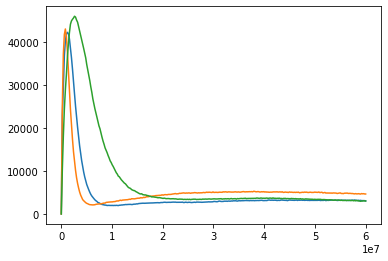

In [800]:
for dms in np.array(dms_dumps):
    plt.plot(trigs, dms[1:, 0] - dms[1:, 1])

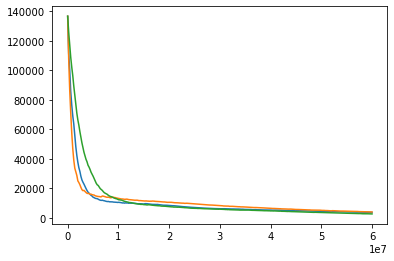

In [801]:
for dms in np.array(dms_dumps):
    plt.plot(trigs, dms[1:, -1].mean() - dms[1:, 0])

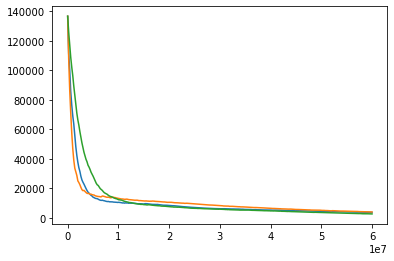

In [802]:
for dms in np.array(dms_dumps):
    plt.plot(trigs, dms[1:, -1].mean() - dms[1:, 0])

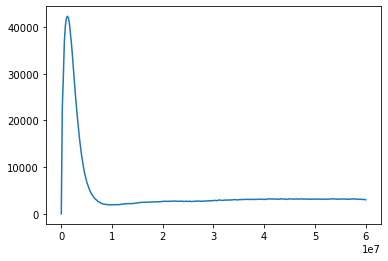

In [803]:
plt.plot(trigs, dms_dumps[0][1:, 0] - dms_dumps[0][1:, 1])

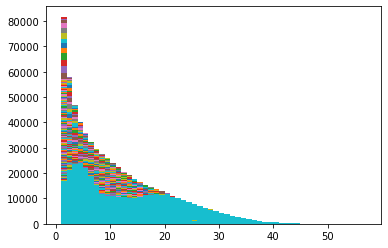

In [804]:
min_times = []
dms_dumps_r = []
data1 = np.fromfile(os.path.join(folder, f'{dmp}.dump'),count=int(-1), dtype=lt.DUMP_TYPE)
data1['time'] = data1['time'] - data1['time'][0]
rand1 = np.random.randint(0, len(data1)-1, int(len(data1)/2))
data2 = data1[rand1]
rand2 = np.random.randint(0, len(data1)-1, int(len(data1)/4))
data4 = data1[rand2]

min_times.append(data1['time'][-1])
min_times.append(data2['time'][-1])
min_times.append(data4['time'][-1])

for data in [data1, data2, data4]:
    data['time'] = data['time'] - data['time'][0]
    data_c = data[data['time'] < min(min_times)]
    trigs = (np.linspace(1, 60000, 300)*1e3).astype(int)
    datas = (data_c['time'] // trigs[-1]).astype(int)
    T_max = datas[-1]
    dms = np.zeros(5)
    for trig in trigs:
        datas = (data_c['time'] // trig).astype(int)
        datas = datas[datas < T_max]
        T = datas[-1]
        nums = np.bincount(datas)
        nums=nums[nums > 0]
        hist = plt.hist(nums, bins=np.unique(nums));
        dms = np.vstack((dms, np.array([hist[0].sum(), 
                                        hist[0][1:].sum(), 
                                        hist[0][2:].sum(),
                                       hist[0][3:].sum(), T])))
        hist, nums = None, None # take it eason memoty 
    dms_dumps_r.append(dms)

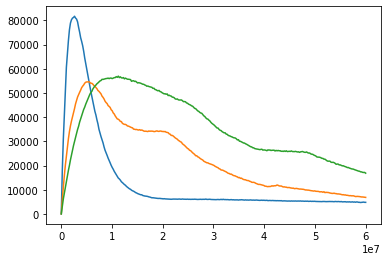

In [805]:
for dms in np.array(dms_dumps_r):
    plt.plot(trigs, dms[1:, 0] - dms[1:, 1])

In [806]:
dmp = 'g2_0'

In [807]:
data1 = np.fromfile(os.path.join(folder, f'{dmp}.dump'),count=int(-1), dtype=lt.DUMP_TYPE)
rand1 = np.sort(np.random.randint(0, len(data1)-1, int(len(data1)/2)))
data2 = data1[rand1]
rand2 = np.sort(np.random.randint(0, len(data1)-1, int(len(data1)/4)))
data4 = data1[rand2]

IndexError: index 36028797023223569 is out of bounds for axis 0 with size 71509325

In [ ]:
corr_window = 30000000
autoc_diffs_tot1, autoc_diffs1 = lt.correlation(data1,
    corr_window=corr_window,
    start_chs=[2],
    stop_chs=[4])

In [ ]:
y, x = np.histogram(autoc_diffs_tot, bins=1000, range=(-corr_window/1000, corr_window/1000))
plt.plot(x[:-1], y)

In [ ]:
for k in autoc_diffs1[::2]:
    y, x = np.histogram(k, bins=1000, range=(-100000, corr_window))
    plt.plot(x[:-1], y)

In [ ]:
corr_window = 30000000
autoc_diffs_tot2, autoc_diffs2 = lt.correlation(data2,
    corr_window=corr_window,
    start_chs=[2],
    stop_chs=[4])

In [ ]:
corr_window = 30000000
autoc_diffs_tot4, autoc_diffs4 = lt.correlation(data4,
    corr_window=corr_window,
    start_chs=[2],
    stop_chs=[4])

In [ ]:
def K_sps(tau, k, gamma, eta=0.9, A=0):
    if eta >= 1:
        print('eta > 1!')
        return 0
    #for TLS:
    rate = k*gamma/(k + gamma)
    pre = (2*eta*rate*np.sqrt(k + gamma)/(np.sqrt(k + gamma - 4*eta*rate)))
    kth = pre*np.exp(-0.5*(k + gamma)*tau)*np.sinh(tau*0.5*np.sqrt(k +gamma)*np.sqrt(k + gamma - 4*eta*rate))
    return A*kth

In [ ]:
def K_laser(tau, k, gamma, eta=0.9, A=0):
    rate = k*gamma/(k + gamma)
    return eta*rate*np.exp(-eta*rate*tau) + A

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
kth, tau = np.histogram(autoc_diffs1[0], bins=1000, range=(min(tau[:-1]), 0.5e7))
tau = tau[:-1]
tau0 = tau/max(tau)
kth0 = kth/max(kth)
kth = kth0[tau0 > 0.1]
tau = tau0[tau0 > 0.1]
plt.plot(tau0, kth0)

In [ ]:
ksps = K_sps(tau0,90,20, eta=0.1)

In [ ]:
plt.plot(tau0, ksps/max(ksps))
plt.plot(tau0, kth0)

In [ ]:
kth = kth0[tau0 > 0.1]
tau = tau0[tau0 > 0.1]

In [ ]:
#plt.plot(tau, ksps/max(ksps))
plt.plot(tau, kth)
plt.plot(tau0, kth0)

In [ ]:
popt, pcov =curve_fit(K_sps, tau/max(tau), kth/max(kth), bounds=([50,50,0.01, 0],[100, 100, 0.99, 1]))#, p0=[80,70, 0.1])
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
tot_err = perr.sum()

In [ ]:
popt

In [ ]:
ksps = K_sps(tau,*popt)
plt.plot(tau, ksps/max(ksps))
plt.plot(tau, kth/max(kth))

In [ ]:
ksps = K_sps(tau,*popt)
plt.plot(tau, ksps, 'k-')
ksps2 = K_sps(tau, popt[0], popt[1], 0.05, popt[3])
plt.plot(tau, ksps2, 'k-')
ksps3 = K_sps(tau, popt[0], popt[1], 0.025, popt[3])
plt.plot(tau, ksps3, 'k-')

In [ ]:
k, t = np.histogram(autoc_diffs1[0], bins=1000, range=(min(tau[:-1]), 0.5e7))
t = t[:-1]
t0 = t/max(t)
k0 = k/max(k)
k = k0[t0 > 0.1]
t = t0[t0 > 0.1]
plt.plot(t, k)
k, t = np.histogram(autoc_diffs2[0], bins=1000, range=(min(tau[:-1]), 0.5e7))
t = t[:-1]
t0 = t/max(t)
k0 = k/max(k)
k = k0[t0 > 0.1]
t = t0[t0 > 0.1]
plt.plot(t, k)
k, t = np.histogram(autoc_diffs4[0], bins=1000, range=(min(tau[:-1]), 0.5e7))
t = t[:-1]
t0 = t/max(t)
k0 = k/max(k)
k = k0[t0 > 0.1]
t = t0[t0 > 0.1]
plt.plot(t, k)



In [ ]:
ksps = K_sps(tau,*popt)
plt.plot(tau, ksps/max(ksps))
plt.plot(tau, kth/max(kth))

###### t= np.linspace(0, 10000, 10000)
plt.plot(t, K_sps(t,0.21,0.01, eta=0.9))
plt.plot(t, K_laser(t,0.21,0.01, eta=0.9))

In [ ]:
y, x = np.histogram(autoc_diffs1[0], bins=1000, range=(-100000, 0.5e7))
plt.plot(x[:-1], y/max(y))
y, x = np.histogram(autoc_diffs2[0], bins=1000, range=(-100000, 0.5e7))
plt.plot(x[:-1], y/max(y))
y, x = np.histogram(autoc_diffs4[0], bins=1000, range=(-100000, 0.5e7))
plt.plot(x[:-1], y/max(y))